# 利用 Hear 訓練偵測模型

In [1]:
import PIL
from PIL import Image
import glob
import os
import shutil
import cv2
from time import sleep
from google.colab import drive
drive.mount('/content/drive')
print( "test good!" )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test good!


### Resize 正樣本 與 測試 圖片

In [2]:
import PIL
from PIL import Image
import glob
import os
import shutil
from time import sleep


def emptydir(dirpath):
    if os.path.isdir('/content/drive/MyDrive/Colab Notebooks/' + dirpath):
        shutil.rmtree('/content/drive/MyDrive/Colab Notebooks/' + dirpath)
        sleep(2)
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/' + dirpath)


def dirResize(src, dst):
    emptydir(dst)
    files = glob.glob('/content/drive/MyDrive/Colab Notebooks/' + src + '/*jpg')
    for i, f in enumerate(files):
        img = Image.open(f)
        img_new = img.resize((300, 250), PIL.Image.ANTIALIAS)
        outname = 'resizejpg' + '{:0>3d}'.format(i+1) + '.jpg'
        img_new.save('/content/drive/MyDrive/Colab Notebooks/' + dst + '/' + outname)


dirResize('cat_sr', 'cat')
dirResize('test_sr', 'test')


<ipython-input-2-8d4696302a1f>:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_new = img.resize((300, 250), PIL.Image.ANTIALIAS)


### 建立 正樣本 圖片格式

In [3]:
import glob
import PIL
from PIL import Image
import os

files = glob.glob('/content/drive/MyDrive/Colab Notebooks/cat/*.jpg')

for i, f in enumerate(files):
    img = Image.open(f)
    newName = f.replace('resize', 'bmp')
    newName = newName.replace('.jpg', '.bmp')
    img.save(newName)
    os.remove(f)


### 建立 負樣本 圖片

In [4]:
import glob
import PIL
from PIL import Image
import os
import shutil
from time import sleep


def emptydir(dirpath):
    if os.path.isdir('/content/drive/MyDrive/Colab Notebooks/' + dirpath):
        shutil.rmtree('/content/drive/MyDrive/Colab Notebooks/' + dirpath)
        sleep(2)
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/' + dirpath)


def dirNeg2Gray(src, dst):
    emptydir(dst)
    files = glob.glob('/content/drive/MyDrive/Colab Notebooks/' + src + '/*jpg')
    for i, f in enumerate(files):
        img = Image.open(f)
        img_new = img.resize((500, 350), PIL.Image.ANTIALIAS)
        newName = 'Gray' + '{:0>3d}'.format(i+1) + '.jpg'
        img_new = img_new.convert('L')
        img_new.save('/content/drive/MyDrive/Colab Notebooks/' + dst + '/' + newName)


dirNeg2Gray('neg_sr', 'neg')


<ipython-input-4-056194ff1607>:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_new = img.resize((500, 350), PIL.Image.ANTIALIAS)


### 處理負樣本

In [5]:
import PIL
import glob
import os

fp = open('/content/drive/MyDrive/Colab Notebooks/Haar-Training-cat/training/negative/bg.txt', 'w')

fp.write("")

files = glob.glob('/content/drive/MyDrive/Colab Notebooks/Haar-Training-cat/training/negative/*.jpg')

text = ''

for file in files:
    basename = os.path.basename(file)
    filename = 'negative/' + basename
    text += filename + '\n'

fp.write(text)
fp.close()


### 利用 OpenCV 使用 haar 特徵模型

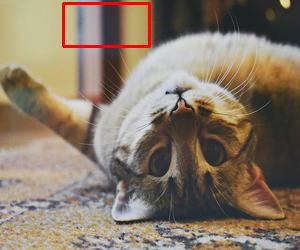

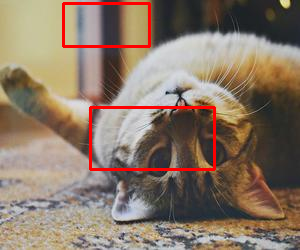

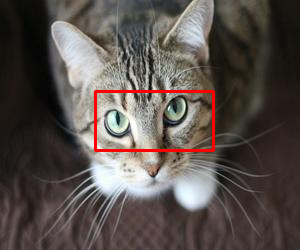

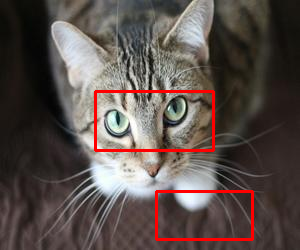

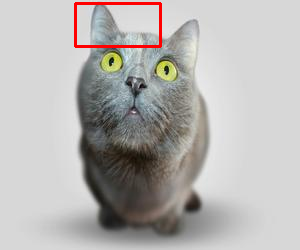

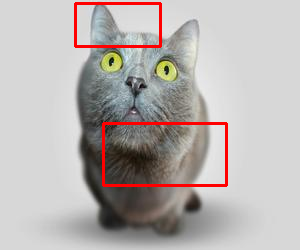

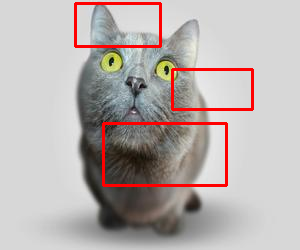

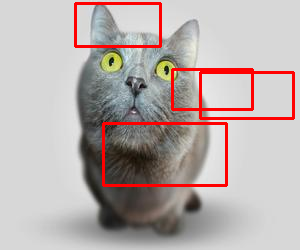

In [11]:
import cv2
import glob
import os
from google.colab.patches import cv2_imshow

def show(image):
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/test/' + image)
    detector = cv2.CascadeClassifier(
        '/content/drive/MyDrive/Colab Notebooks/Haar-Training-cat/training/cascades/cascade.xml')
    signs = detector.detectMultiScale(img, minSize=(
        80, 40), scaleFactor=1.1, minNeighbors=1)
    if len(signs) > 0:
        for (x, y, w, h) in signs:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2_imshow(img)
            cv2.waitKey(1000)
    else:
        print("False")
    cv2.destroyAllWindows()


files = glob.glob('/content/drive/MyDrive/Colab Notebooks/test/*.jpg')
for i, f in enumerate(files):
    show(os.path.basename(f))
